In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'AUG 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,23.63,21.71,27.02,17.82,3.99,93.31,3.16
1,2022,2,23.73,21.53,27.25,17.94,6.55,93.21,3.05
2,2022,3,23.69,21.83,26.51,18.25,27.86,93.14,2.50
3,2022,4,23.24,22.04,25.59,18.01,18.47,93.11,2.78
4,2022,5,23.05,21.97,24.48,17.88,12.24,93.11,3.61


In [ ]:
data.shape


(31, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,23.63,21.71,27.02,17.82,3.99,3.16
1,2022,2,23.73,21.53,27.25,17.94,6.55,3.05
2,2022,3,23.69,21.83,26.51,18.25,27.86,2.50
3,2022,4,23.24,22.04,25.59,18.01,18.47,2.78
4,2022,5,23.05,21.97,24.48,17.88,12.24,3.61


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2022.0,16.000000,22.915484,21.080645,25.774516,17.172903,11.845161,3.889355
std,0.0,9.092121,0.608582,0.561236,1.352535,0.584832,13.992043,1.491411
min,2022.0,1.000000,21.800000,20.070000,23.600000,16.240000,1.080000,0.890000
25%,2022.0,8.500000,22.555000,20.635000,24.655000,16.785000,3.980000,2.825000
50%,2022.0,16.000000,22.900000,21.100000,25.780000,17.030000,5.800000,3.840000
75%,2022.0,23.500000,23.190000,21.490000,26.655000,17.760000,15.015000,4.765000
max,2022.0,31.000000,24.660000,22.100000,29.020000,18.310000,63.400000,6.790000


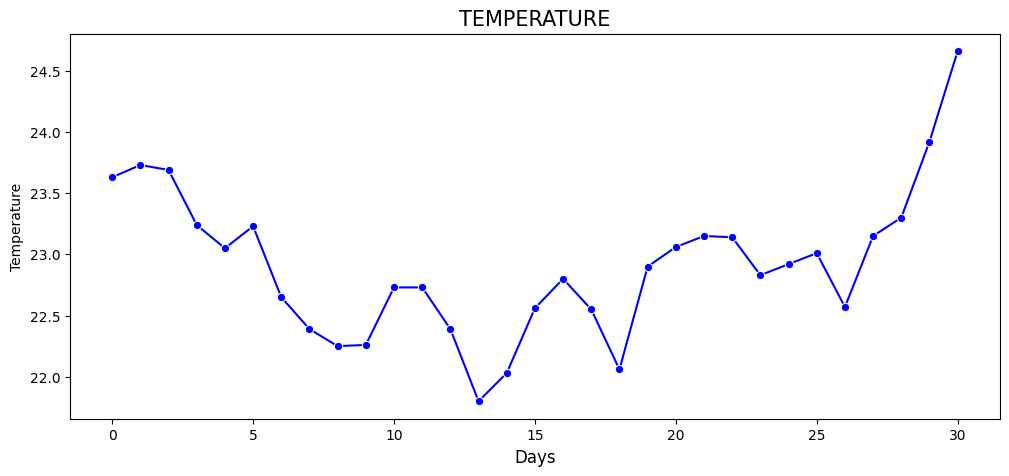

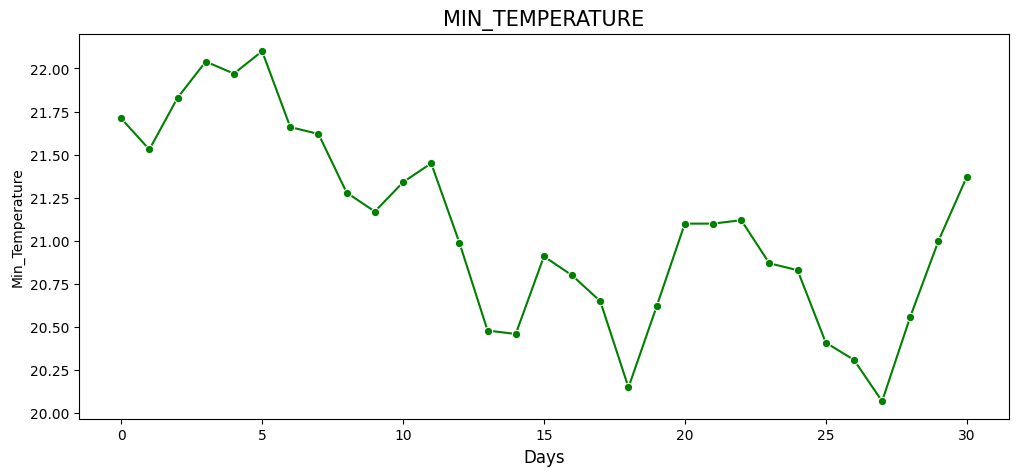

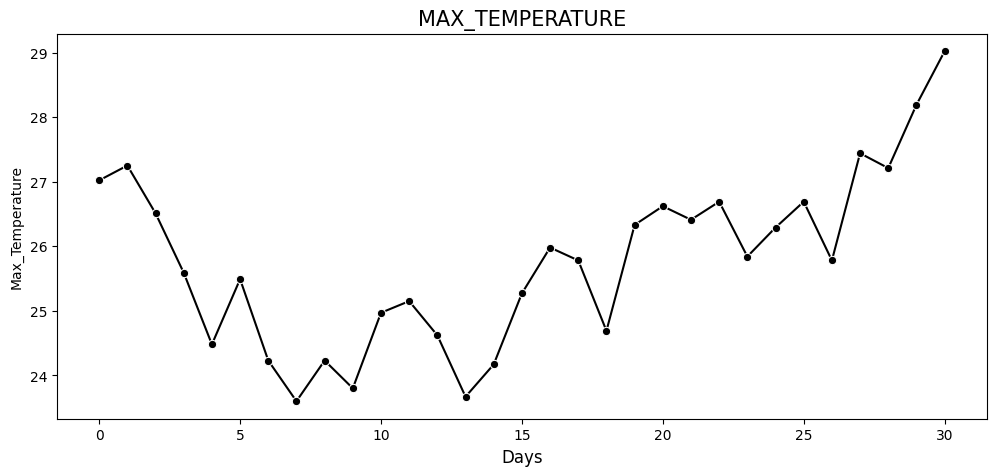

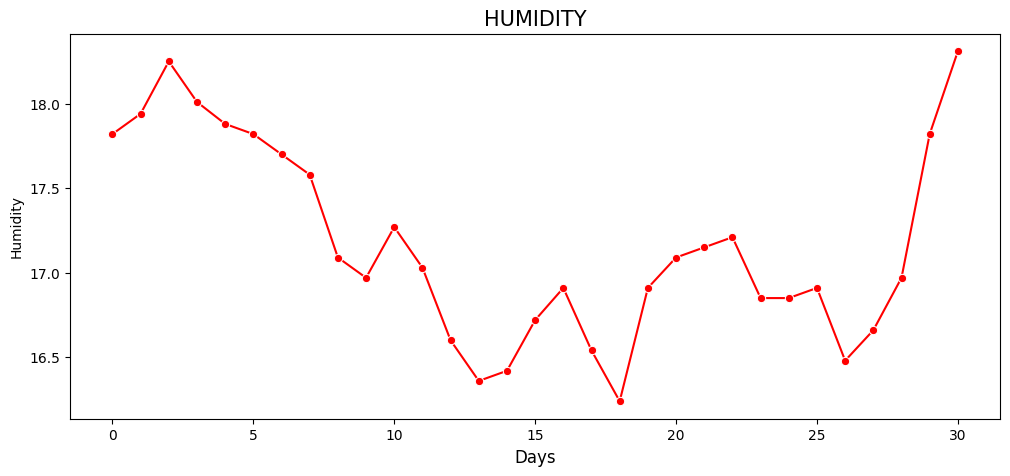

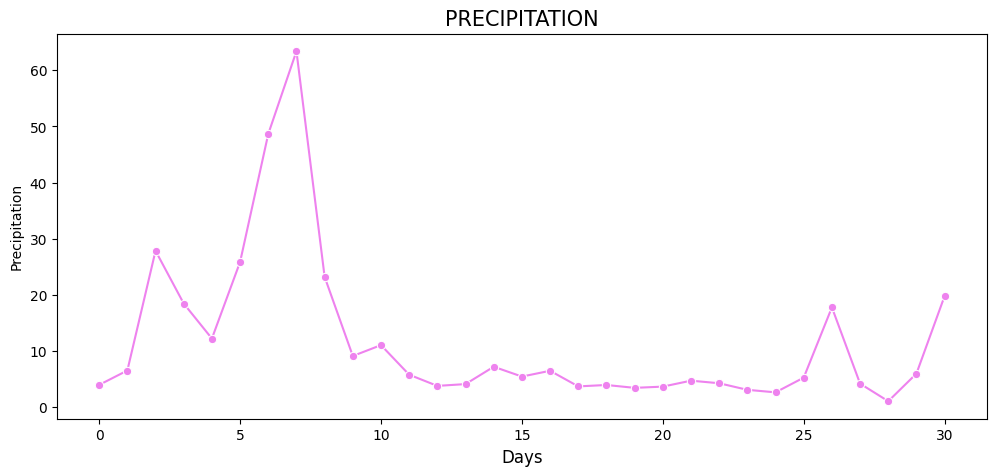

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


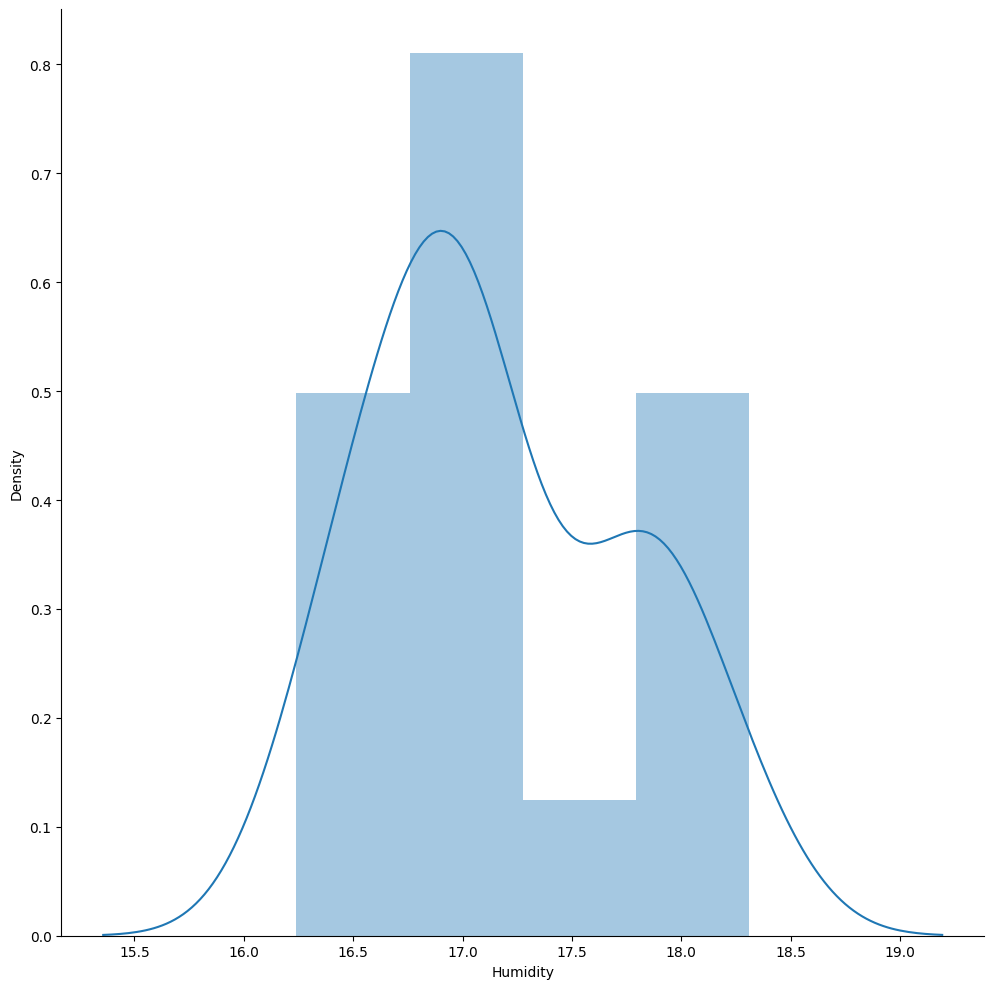

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

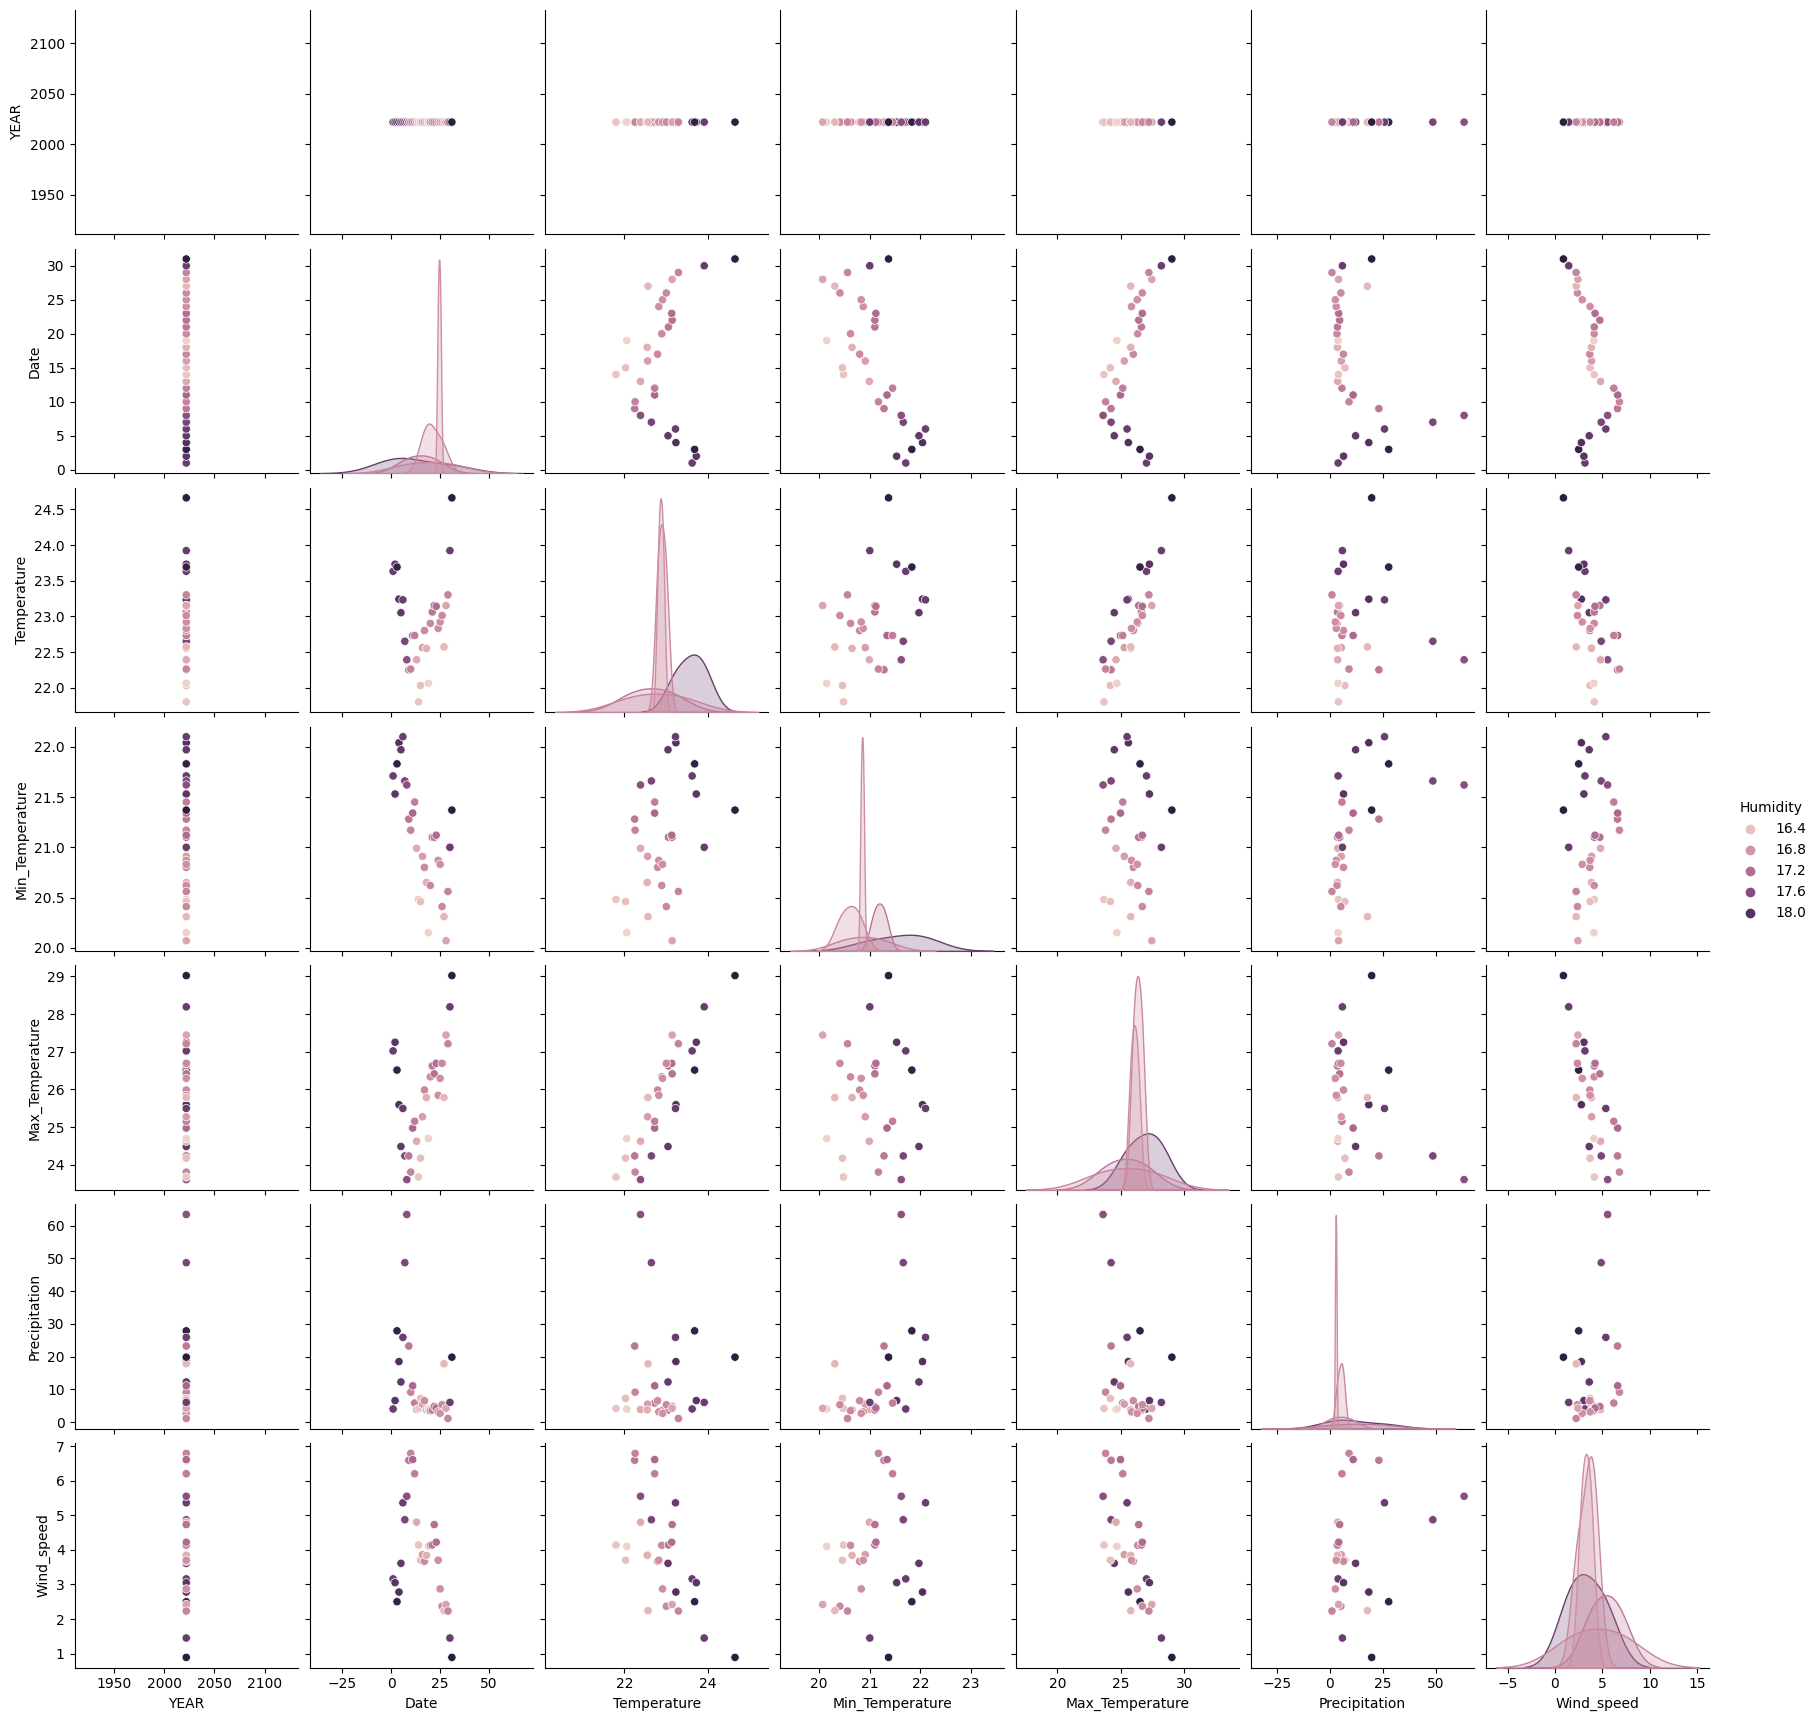

In [ ]:
sns.pairplot(data,hue="Humidity")

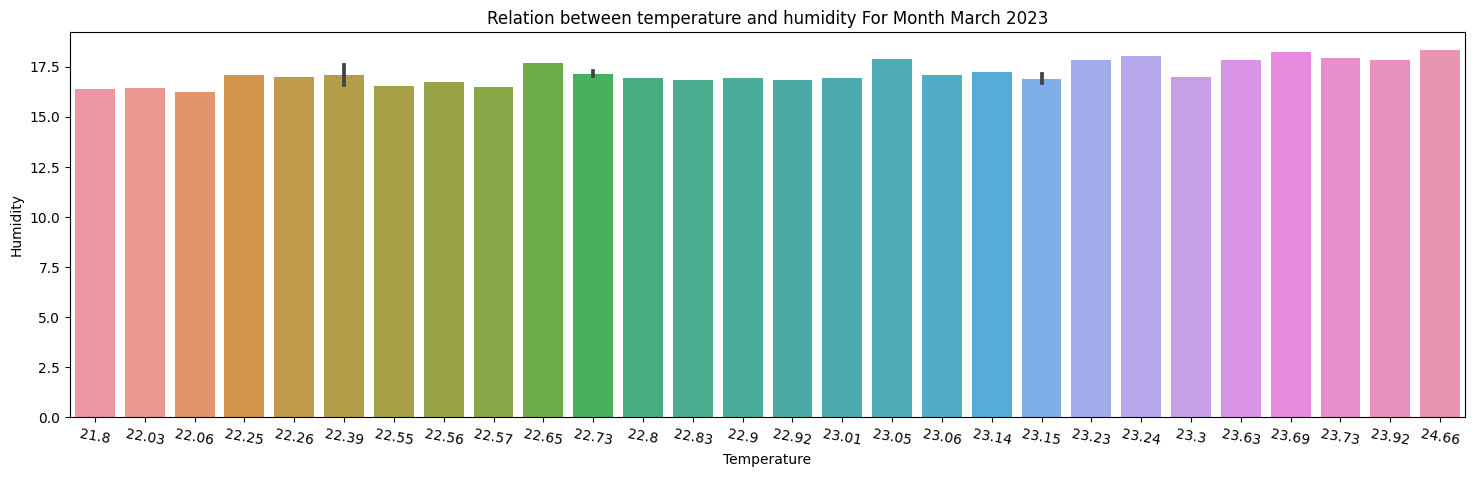

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

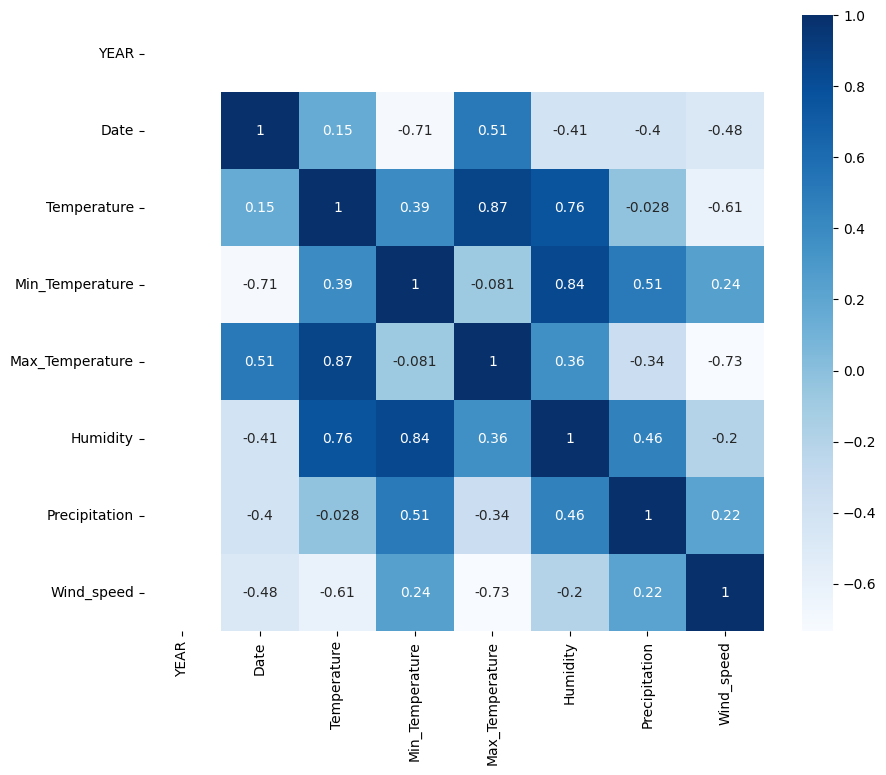

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

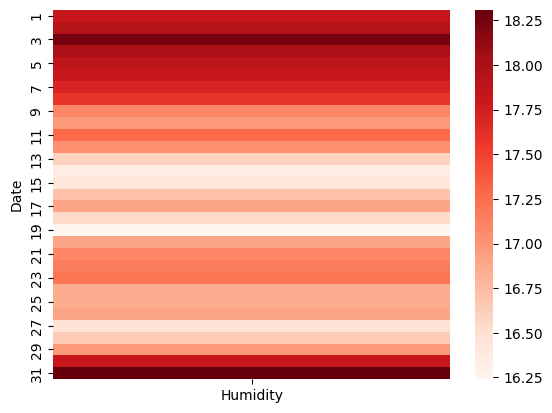

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

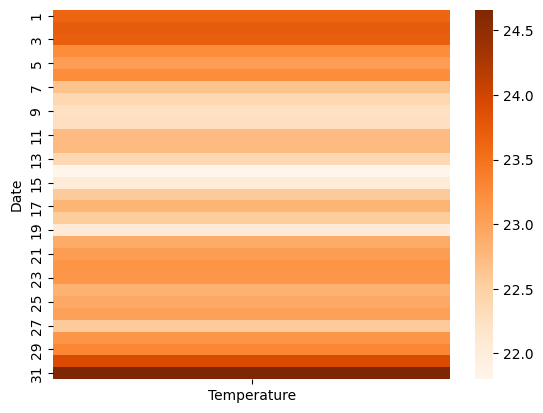

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,23.63,17.82,3.99,3.16
1,23.73,17.94,6.55,3.05
2,23.69,18.25,27.86,2.50
3,23.24,18.01,18.47,2.78
4,23.05,17.88,12.24,3.61
5,23.23,17.82,25.87,5.36
6,22.65,17.70,48.67,4.87
7,22.39,17.58,63.40,5.55
8,22.25,17.09,23.22,6.59
9,22.26,16.97,9.13,6.79


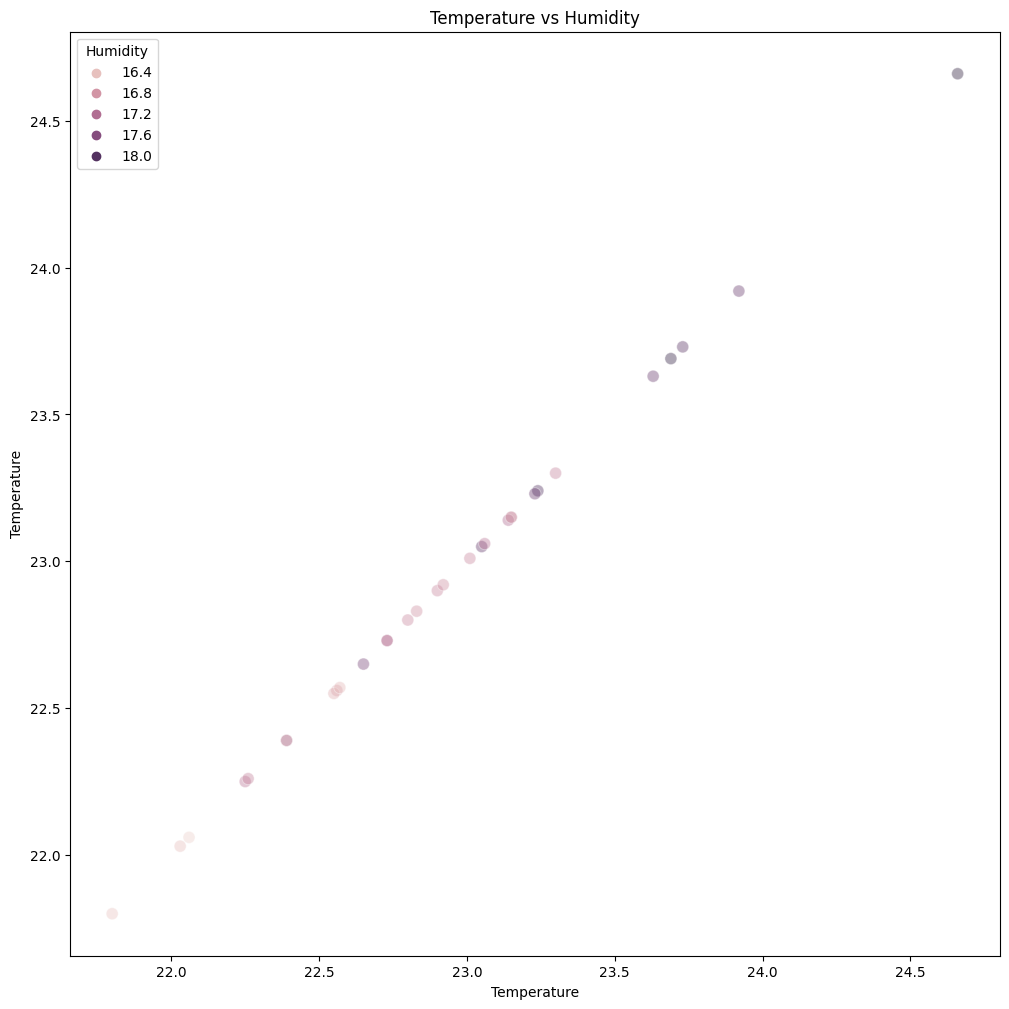

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

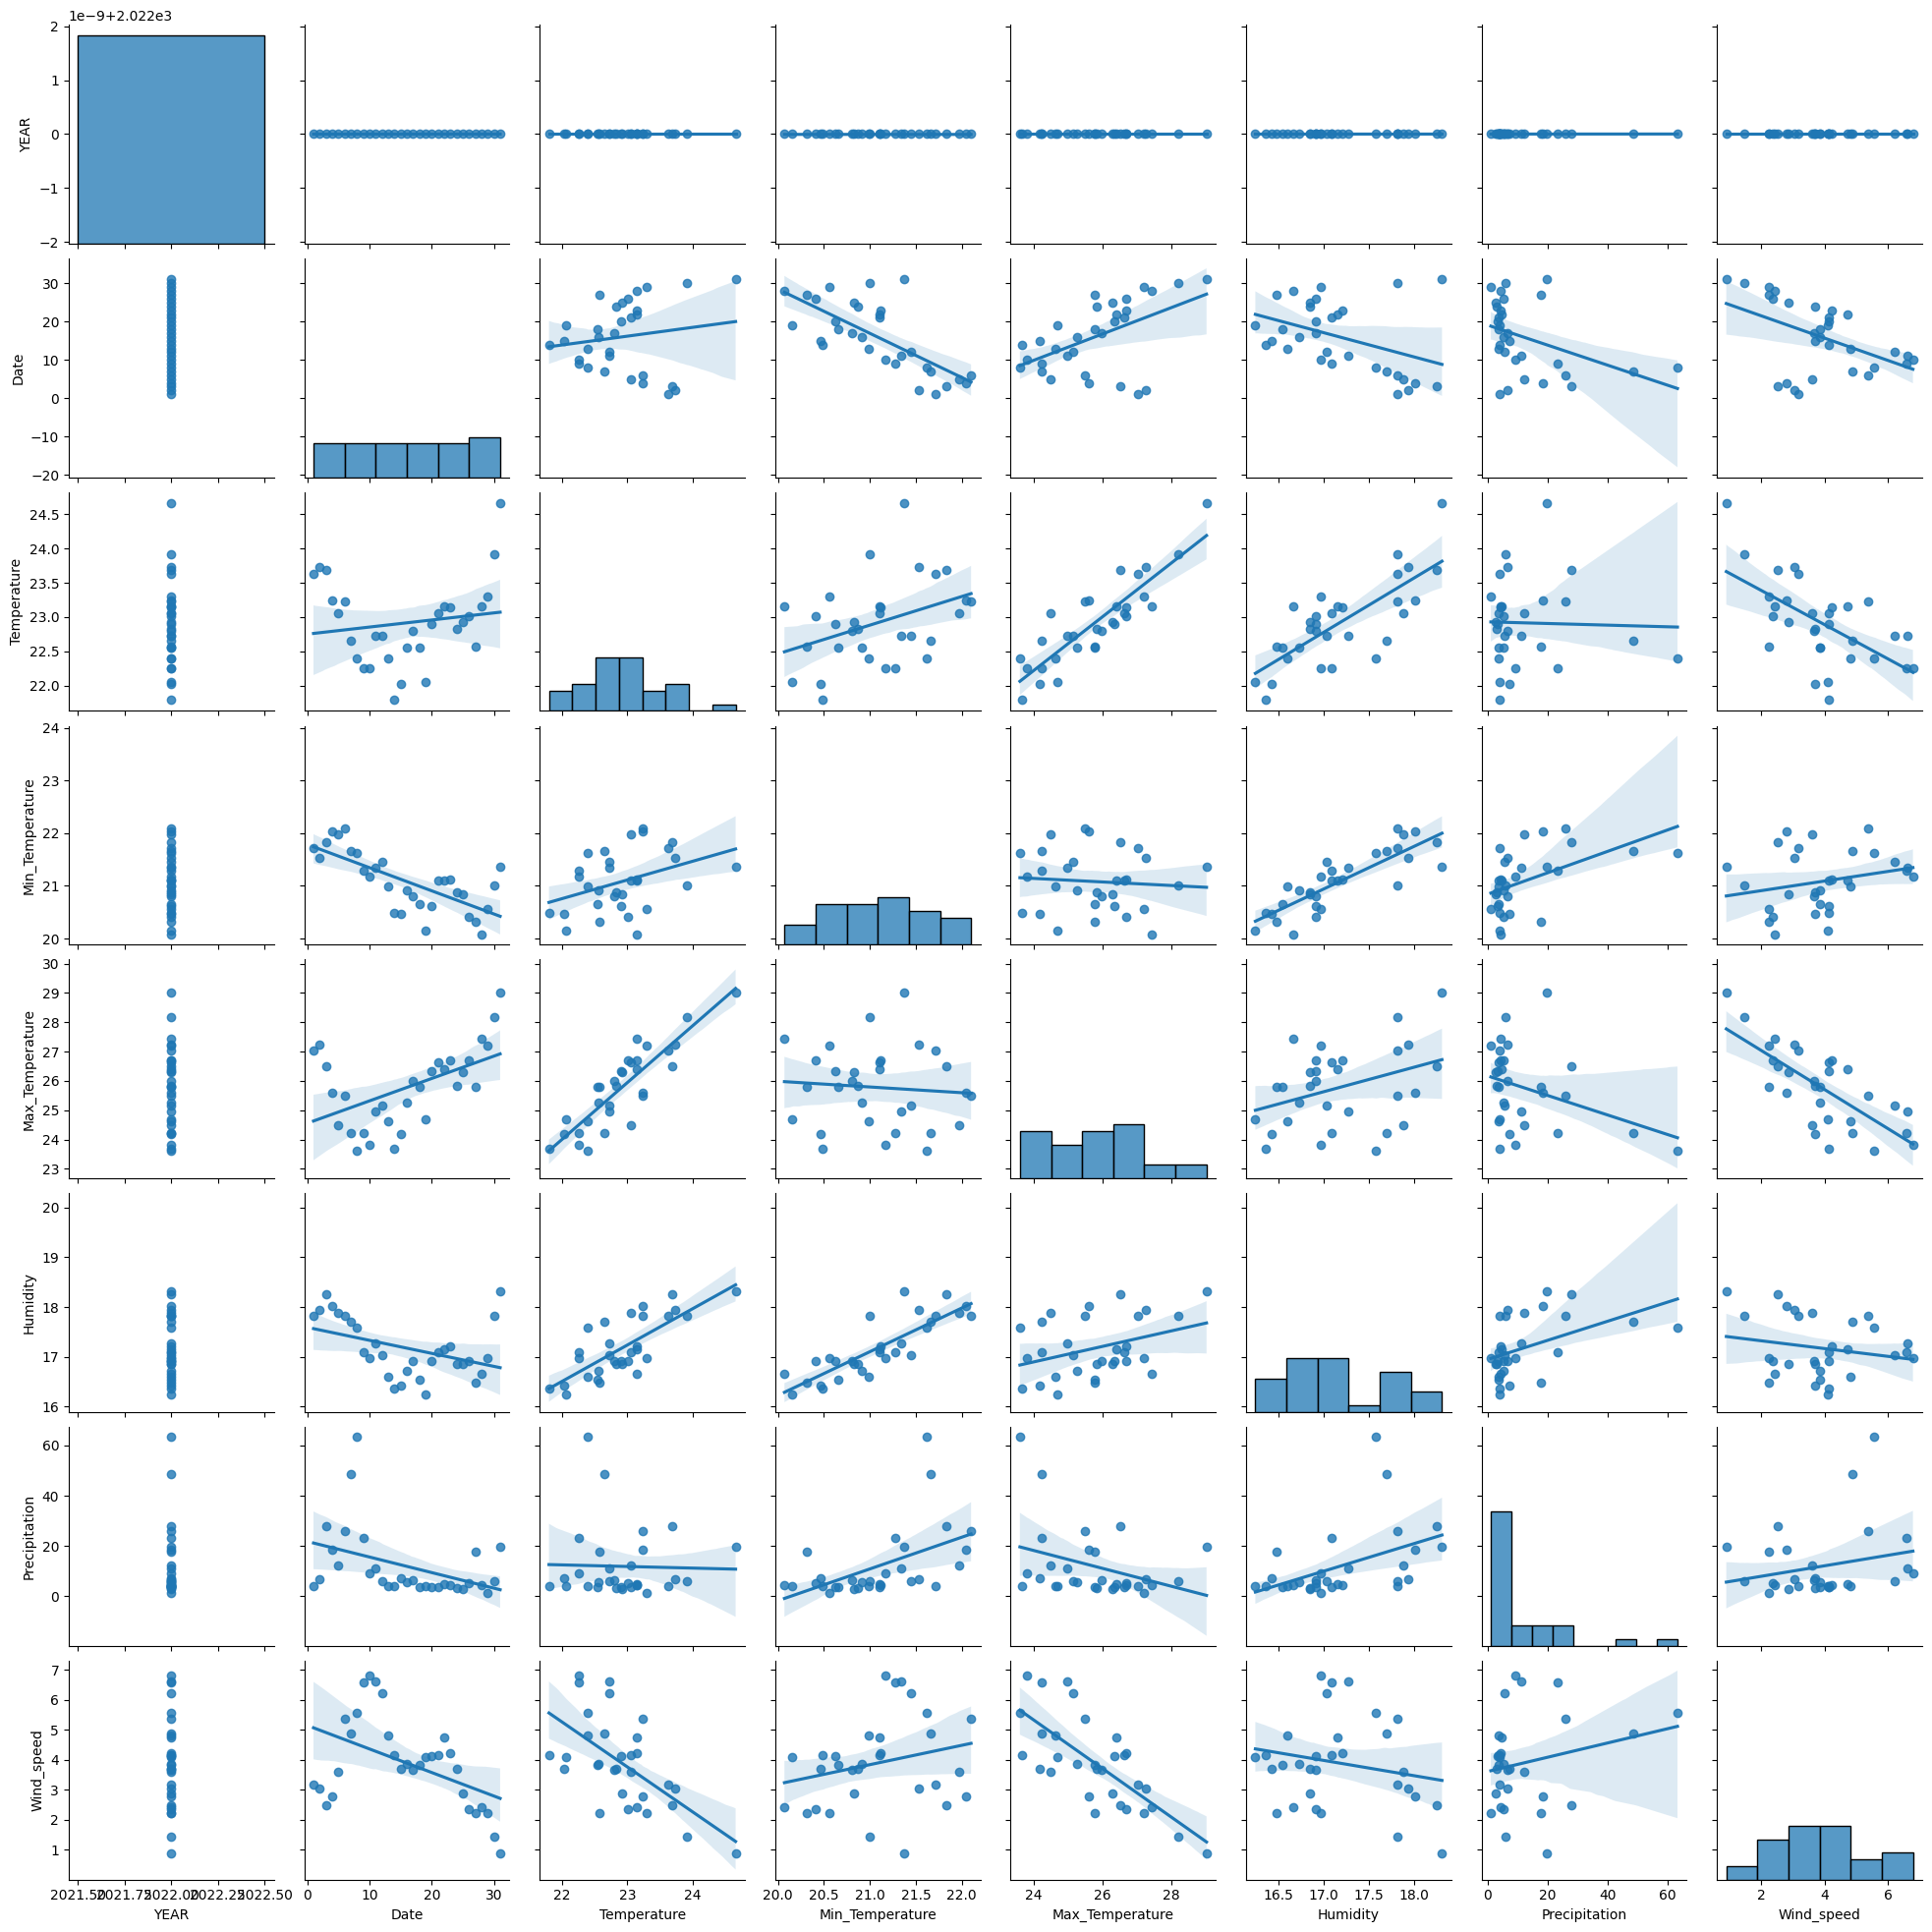

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

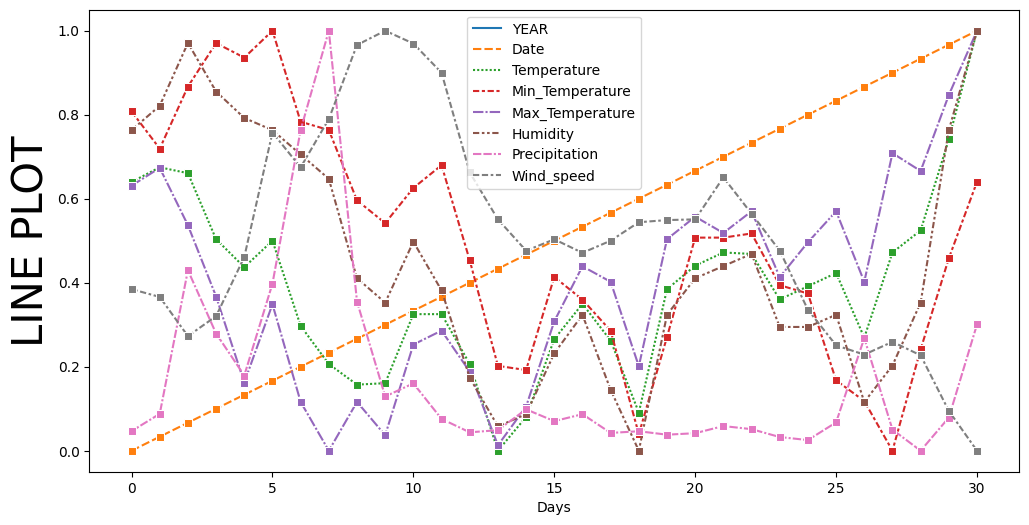

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

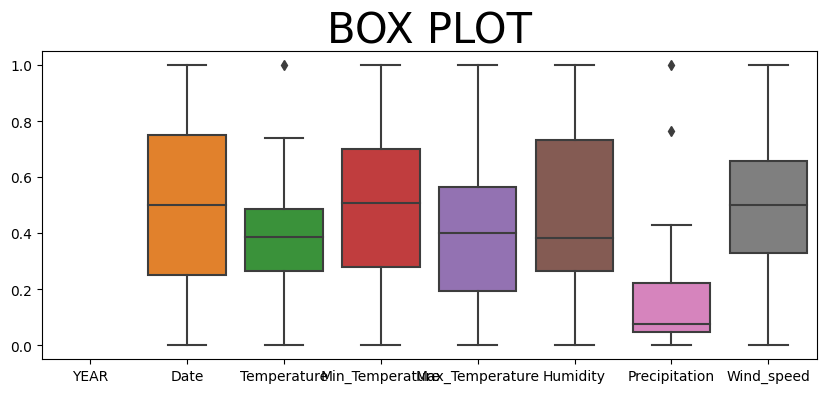

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

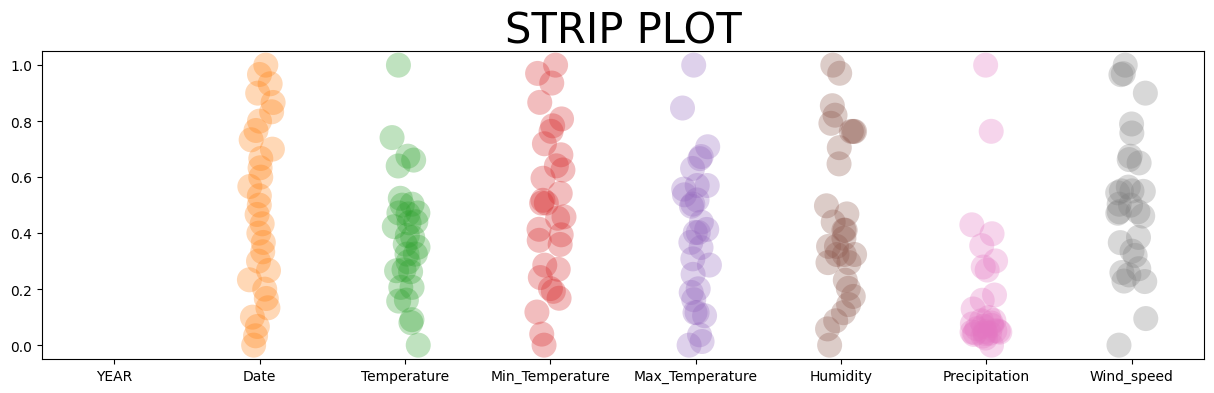

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()